# Exploratory Data Visualization

This Notebook demonstrates exploratory data visualization using pandas , matplotlib and plotly

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
py.sign_in('youssef.emad.293', '0gxvde9i5t')
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Exploring The Drinks Dataset

In [12]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)
drinks_no_filter = pd.read_csv(url)

In [13]:
len(drinks[drinks['continent'] == 'NA'])

23

In [14]:
len(drinks_no_filter[drinks_no_filter['continent'] == 'NA'])

0

In [15]:
drinks.describe()

,beer,spirit,wine,liters
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


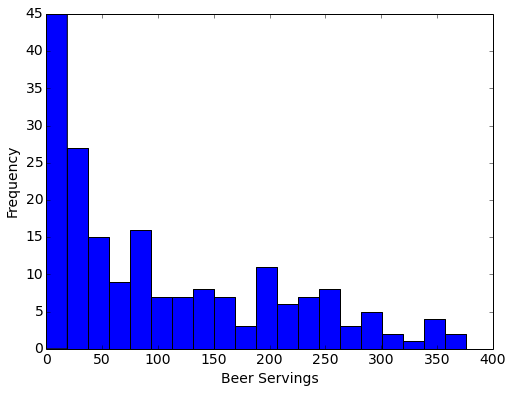

In [16]:
plt.hist(drinks.beer,bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

array([[<matplotlib.axes.AxesSubplot object at 0x7f6a11815210>,
        <matplotlib.axes.AxesSubplot object at 0x7f6a1136a690>]], dtype=object)

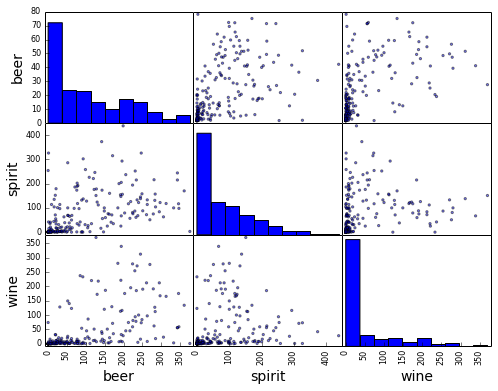

In [17]:
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

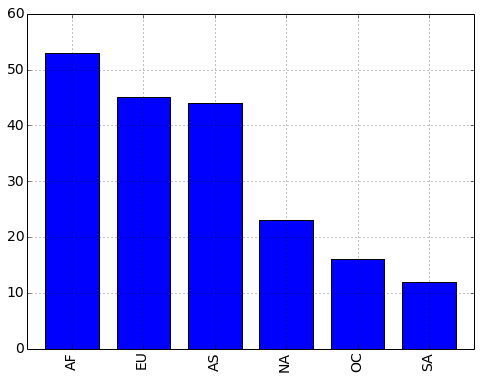

In [18]:
drinks.continent.value_counts()

drinks.continent.value_counts().plot(kind='bar')

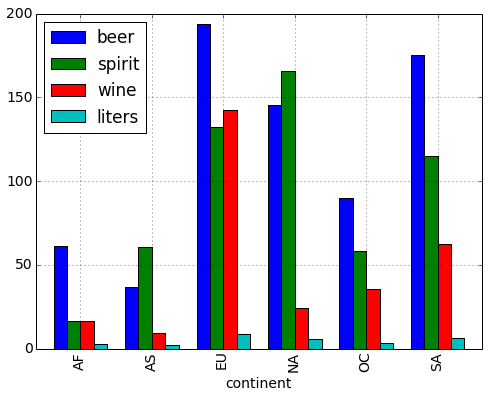

In [19]:
drinks.groupby('continent').mean().plot(kind='bar')

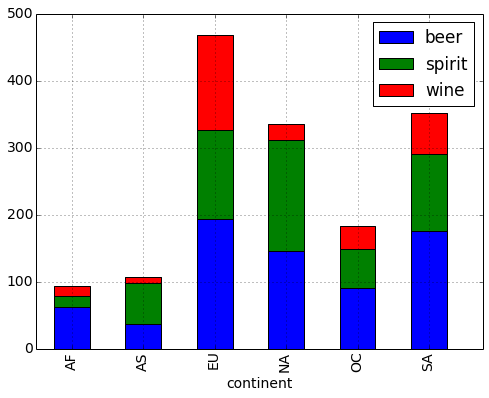

In [20]:
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

## Plotly

In [21]:
import plotly.tools as tls
tls.embed('https://plot.ly/~chris/7365')

In [22]:
from plotly.graph_objs import Histogram
plt.figure(figsize=(15,5))
py.iplot([Histogram(x=drinks.beer)], nbinsx=20, filename='drinks_beer')

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



In [23]:
from plotly.graph_objs import Scatter
trace= Scatter(x=drinks['beer'],y=drinks['spirit'],mode='markers',text=drinks['country'])
py.iplot([trace],filename='scatter')

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



## Exploring the Baseball Club Dataset

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/mkcor/baseball-notebook/master/Batting.csv')
data.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,...
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,...
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...
3,aardsda01,2008,1,BOS,AL,47,5,1,0,0,0,0,0,0,0,0,0,1,0,0,...
4,aardsda01,2009,1,SEA,AL,73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,...


In [25]:
data.describe()

,yearID,stint,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,
count,97889.000000,97889.000000,97889.000000,96483.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91052.000000,90176.000000,68022.000000,91476.000000,83638.000000,54912.000000,88656.000000,85138.000000,55443.000000,65368.000000,...
mean,1961.732922,1.076873,51.654078,49.130790,154.067766,20.468615,40.366883,6.799543,1.424483,3.001640,18.472214,3.264616,1.384802,14.215073,21.951768,1.281960,1.135919,2.563920,1.202532,3.329045,...
std,38.104588,0.282653,47.267487,48.869353,187.374936,28.935336,53.674482,9.855328,2.755706,6.455669,26.987381,8.055966,2.900107,21.298814,28.141424,2.968605,2.333229,4.427705,2.057438,4.878830,...
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...
25%,1931.000000,1.000000,13.000000,7.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...
50%,1970.000000,1.000000,35.000000,32.000000,61.000000,5.000000,12.000000,2.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,11.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...
75%,1995.000000,1.000000,81.000000,81.000000,260.000000,31.000000,66.000000,10.000000,2.000000,3.000000,28.000000,2.000000,1.000000,21.000000,31.000000,1.000000,1.000000,3.000000,2.000000,5.000000,...
max,2013.000000,5.000000,165.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000,...


In [26]:
data = data[data['yearID'] > 2003]
len(data)

13252

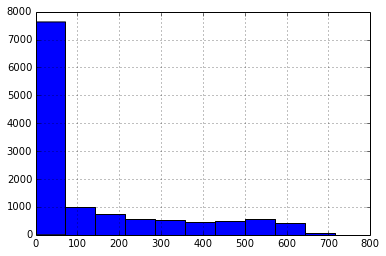

In [27]:
%matplotlib inline
data['AB'].hist()

In [28]:
py.iplot([Histogram(x=data['AB'],nbinsx=10)],filename='baseball_histogram')

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



In [29]:
from plotly.graph_objs import Scatter
trace= Scatter(x=data['AB'],y=data['H'],mode='markers',text=data['playerID'])
py.iplot([trace],filename='scatter')

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.

